In [32]:
from sklearn.preprocessing import scale 
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as pit 
import numpy as np 
import pandas as pd 
%matplotlib inline
iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_Length', 
                                               'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_Length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0) 
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [34]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [35]:
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count() 
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0] 
irisDF['pca_y'] = pca_transformed[:, 1] 
irisDF.head(3)

,sepal_length,sepal_width,petal_Length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [37]:
import matplotlib.pyplot as plt

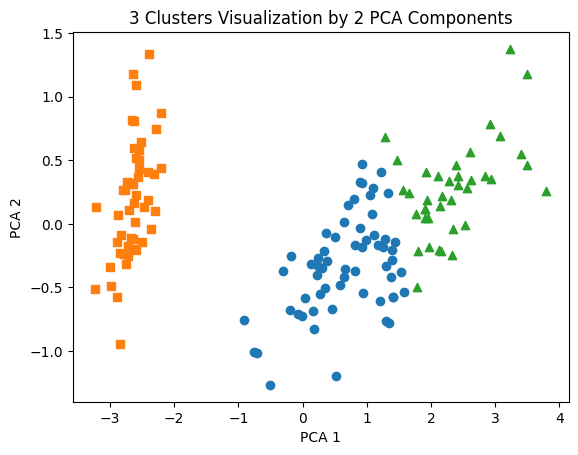

In [38]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pea스 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s') 
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1') 
plt.ylabel('PCA 2') 
plt.title('3 Clusters Visualization by 2 PCA Components') 
plt.show()

In [39]:
import numpy as np
import matplotlib.pyplot as pit 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0) 
print(X.shape, y.shape)
# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True) 
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [40]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2']) 
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


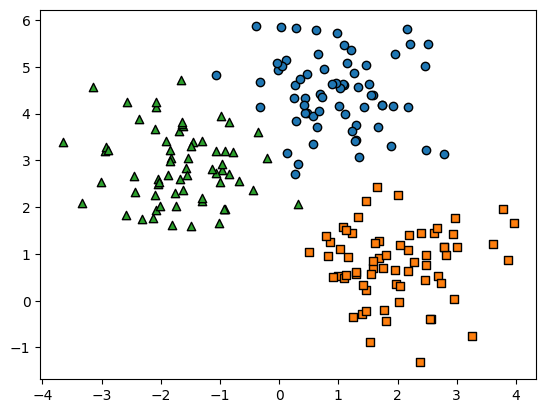

In [41]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's','^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 targetjist는 [0, 1, 2]
# target=0, target=1 z target=2 로 scatter plot을 marker별로 생성 .
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', 
                marker=markers[target])
plt.show()

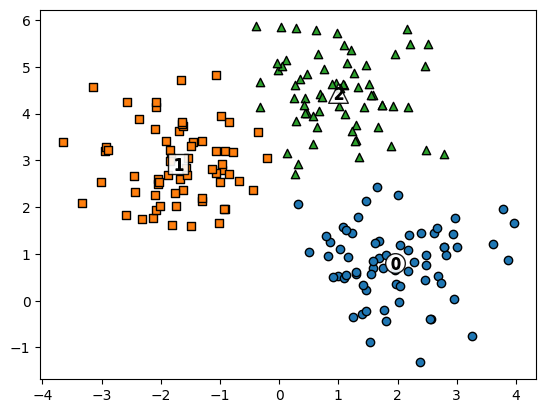

In [42]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0) 
cluster_labels = kmeans.fit_predict(X)
clusterDF ['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출 
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label])
    
# 군집별 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', 
            alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [43]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


In [44]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_Length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF) 
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster']) 
print('silhouette_samples( ) return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF ['silhouette_coeff' ] = score_samples
# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples( ) return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.551


,sepal_length,sepal_width,petal_Length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [45]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.422323
1    0.797604
2    0.436842
Name: silhouette_coeff, dtype: float64

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(cluster_lists, X_features):
    """
    cluster_lists: [2,3,4,5]처럼 여러 군집 개수 리스트
    X_features: 군집할 데이터셋 (numpy array 또는 pandas DF)
    """

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(1, n_cols, figsize=(5*n_cols, 5))

    if len(cluster_lists) == 1:
        axs = [axs]   # subplot이 1개면 리스트로 변환

    for idx, k in enumerate(cluster_lists):
        # 1. KMeans 군집 수행
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)
        labels = kmeans.fit_predict(X_features)

        # 2. 실루엣 계수 계산
        silhouette_vals = silhouette_samples(X_features, labels)

        # 3. 군집별 평균 실루엣 계산
        cluster_avg = []
        for cluster in range(k):
            cluster_sil_vals = silhouette_vals[labels == cluster]
            cluster_avg.append(np.mean(cluster_sil_vals))

        # 4. 시각화 (막대 그래프)
        ax = axs[idx]
        ax.bar(range(k), cluster_avg)
        ax.set_title(f"Clusters={k}", fontsize=15)
        ax.set_xlabel("Cluster")
        ax.set_ylabel("Average Silhouette Score")
        ax.set_xticks(range(k))
        ax.set_ylim(0, 1)

    plt.suptitle("Average Silhouette Score per Cluster", fontsize=18)
    plt.tight_layout()
    plt.show()


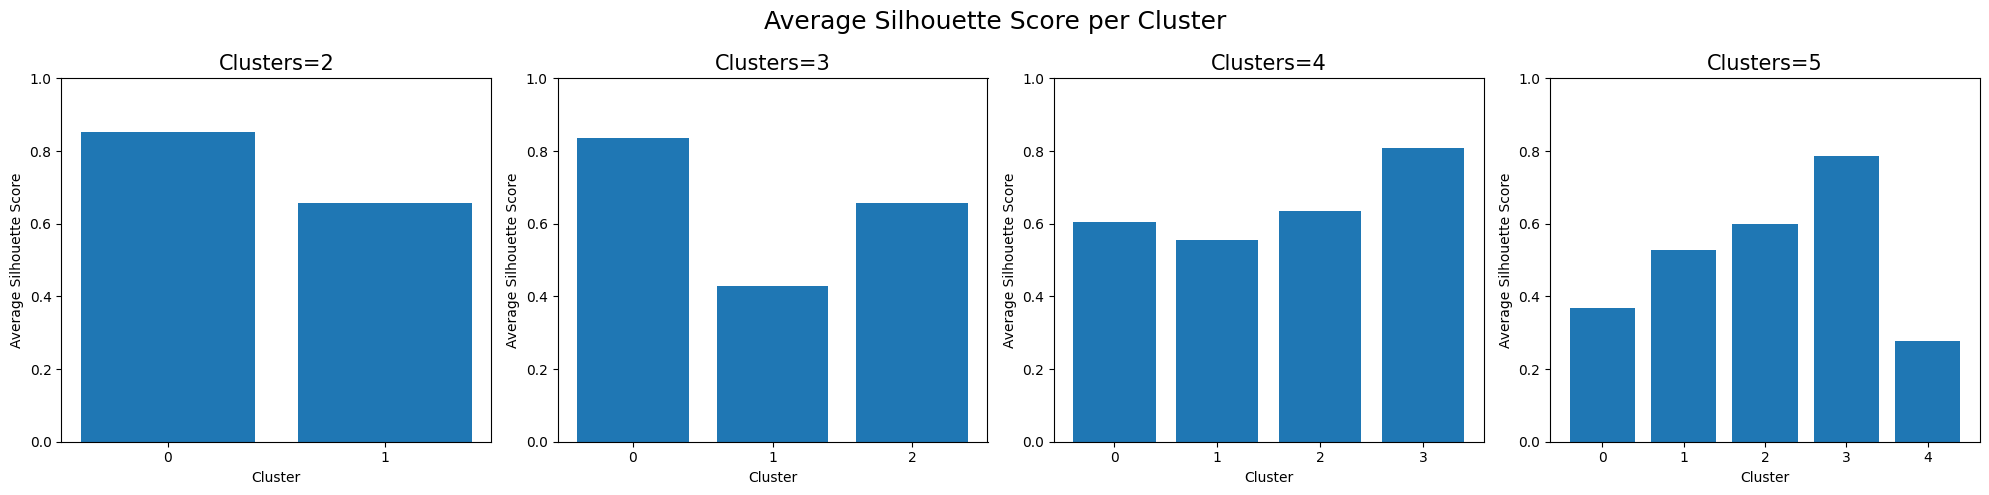

In [47]:
# make_blobs를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성 
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, 
center_box=(-10.0, 10.0), shuffle=True, random_state=1)
# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], X)

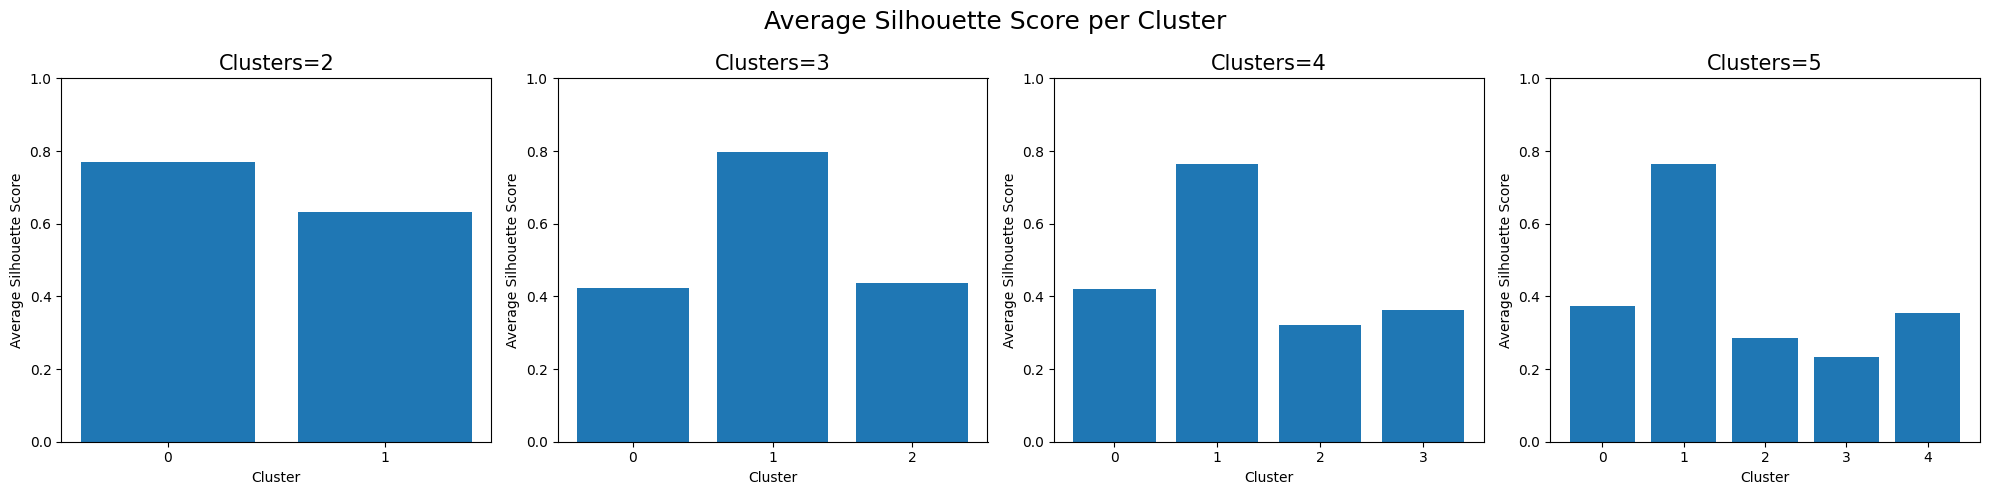

In [48]:
from sklearn.datasets import load_iris 
iris=load_iris()
visualize_silhouette([ 2, 3, 4, 5 ], iris.data) 

In [49]:
import numpy as np 
from sklearn.datasets import make_blobs 
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift= MeanShift(bandwidth=0.8) 
cluster_labels = meanshift.fit_predict(X) 
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [50]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [51]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


In [52]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2']) 
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산 
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth) 
cluster_labels = meanshift.fit_predict(X)
print( 'cluster labels 유형 :', np.unique(cluster_labels))

cluster labels 유형 : [0 1 2]


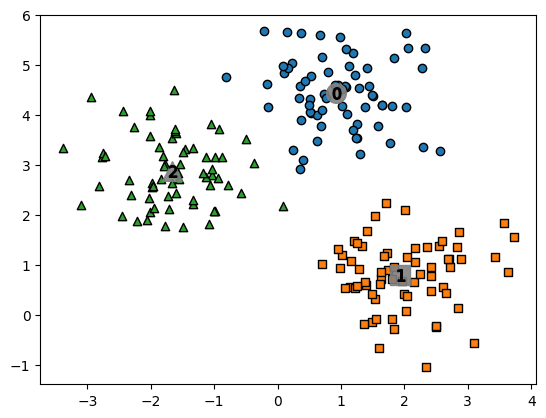

In [53]:
import matplotlib.pyplot as pit 
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels 
centers = meanshift.cluster_centers_ 
unique_labels = np.unique(cluster_labels) 
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label] 
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

In [54]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


In [55]:
from sklearn.datasets import load_iris 
from sklearn.cluster import KMeans
import matplotlib.pyplot as pit
import numpy as np
import pandas as pd 
%matplotlib inline
iris = load_iris() 
feature_names = ['sepal_length', 'sepal_Width', 'petal_length', 'petal_width']
# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환 
irisDF = pd.DataFrame(data=iris.data, columns=feature_names) 
irisDF['target'] = iris.target

In [56]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data) 
gmm_cluster_labels = gmm.predict(iris.data)
# 군집화 결과를 irisDF의 'gmicluster' 칼럼명으로 저장
irisDF ['gmm_cluster'] = gmm_cluster_labels 
irisDF['target'] = iris.target
# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인.
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts() 
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [57]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data) 
kmeans_cluster_labels = kmeans.predict(iris.data) 
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts() 
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


In [58]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    """
    clusterobj: KMeans, GaussianMixture 등 학습 완료 클러스터 객체. None이면 make_blobs 데이터 시각화
    dataframe: 피처 데이터 + 라벨(군집 결과 또는 target) 포함 DataFrame
    label_name: 군집화 라벨 컬럼명 (clusterobj가 None이면 make_blobs target 컬럼명)
    iscenter: clusterobj가 중심 좌표 제공 시 True, 아니면 False
    """
    
    # 군집 레이블 추출
    labels = dataframe[label_name].values
    unique_labels = np.unique(labels)
    
    # 마커 설정
    markers = ['o', 's', '^', 'x', '*', 'D', 'p', 'h', '+']
    
    plt.figure(figsize=(6,6))
    
    for i, label in enumerate(unique_labels):
        marker = markers[i % len(markers)]
        subset = dataframe[labels == label]
        plt.scatter(subset.iloc[:,0], subset.iloc[:,1], marker=marker, label=f'Cluster {label}')
    
    # 중심 좌표 표시
    if clusterobj is not None and iscenter:
        if hasattr(clusterobj, 'cluster_centers_'):  # KMeans
            centers = clusterobj.cluster_centers_
        elif hasattr(clusterobj, 'means_'):  # GaussianMixture
            centers = clusterobj.means_
        else:
            centers = None
        
        if centers is not None:
            plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, label='Centers')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.show()


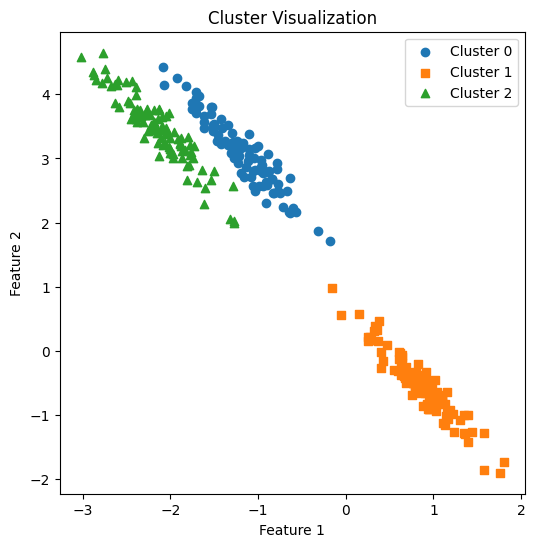

In [59]:
from sklearn.datasets import make_blobs
# mak은_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦.
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)
# 길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장 
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2']) 
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

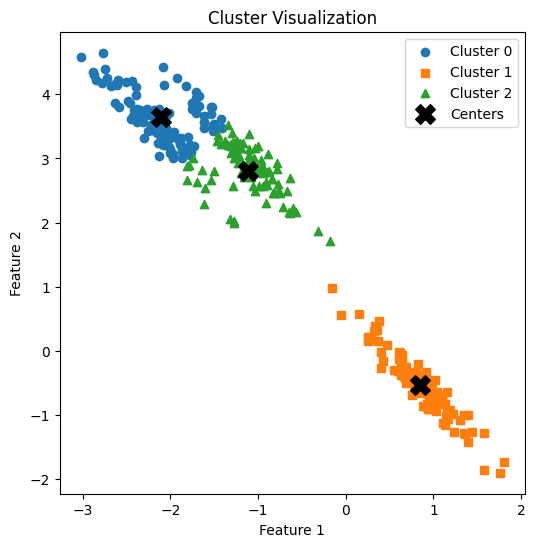

In [60]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0) 
kmeans_label = kmeans.fit_predict(X_aniso) 
clusterDF['kmeans_label'] = kmeans_label
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

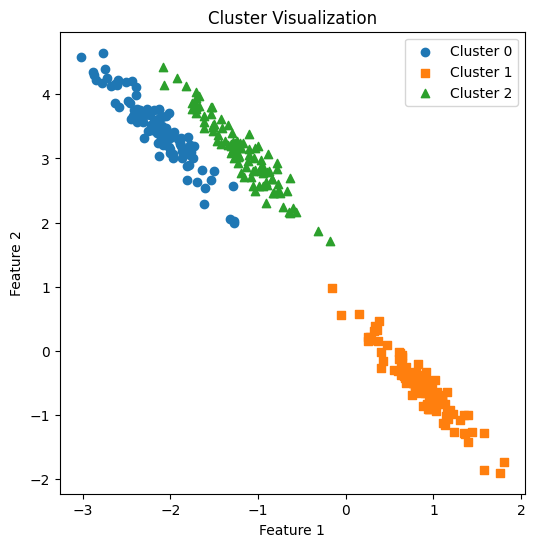

In [61]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0) 
gmm_label = gmm.fit(X_aniso).predict(X_aniso) 
clusterDF ['gmm_label' ] = gmm_label
# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [62]:
print('### KMeans Clustering ###')
print (clusterDF.groupby('target')['kmeans_label'].value_counts()) 
print('\n### Gaussian Mixture Clustering ###') 
print(clusterDF.groupby('target')[ 'gmm_label' ].value_counts ())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


In [63]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts() 
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


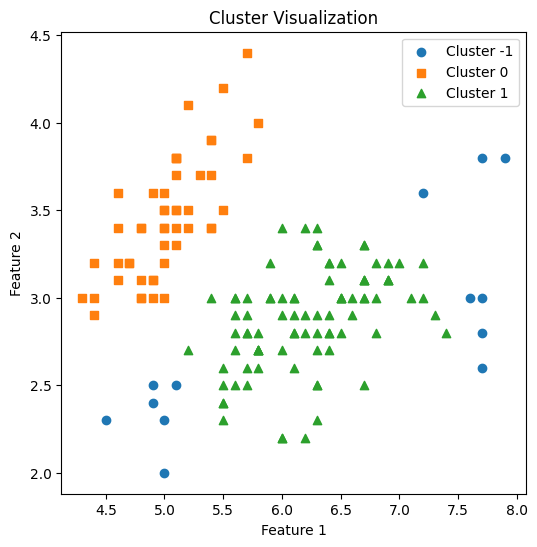

In [64]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0) 
pca_transformed = pca.fit_transform(iris.data) 
# visualize_clusterj)lot( ) 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성 
irisDF['ftr1'] = pca_transformed[:, 0] 
irisDF['ftr2'] = pca_transformed[:, 1 ]
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [65]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_cluster_2d(df, label_col, centers=None, legend=True):
    """
    df: pandas DataFrame, 시각화할 데이터
    label_col: cluster label 컬럼명
    centers: 중심 좌표 (DBSCAN은 없음)
    legend: 범례 표시 여부
    """
    labels = df[label_col].values
    unique_labels = np.unique(labels)
    
    markers = ['o', 's', '^', 'x', '*', 'D', 'p', 'h', '+']
    
    plt.figure(figsize=(6,6))
    
    for i, label in enumerate(unique_labels):
        marker = markers[i % len(markers)]
        subset = df[labels == label]
        plt.scatter(subset.iloc[:,0], subset.iloc[:,1], marker=marker, label=f'Cluster {label}')
    
    # 중심 좌표 표시 (DBSCAN은 보통 없음)
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='black', marker='X', s=200, label='Centers')
    
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    if legend:
        plt.legend()
    plt.title('Cluster Visualization')
    plt.show()


target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


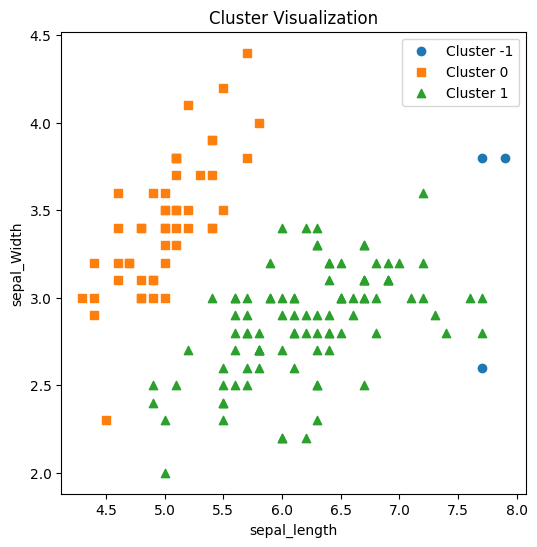

In [66]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean') 
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels 
irisDF['target'] = iris.target
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts() 
print(iris_result)
visualize_cluster_2d(irisDF, 'dbscan_cluster', centers=None, legend=True)

In [67]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan

DBSCAN(eps=0.6, min_samples=16)

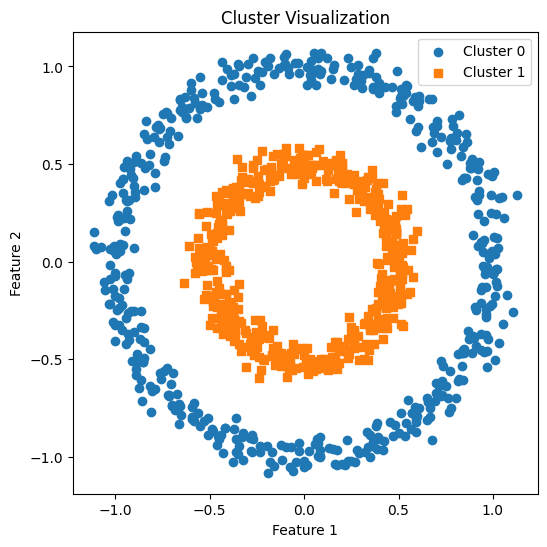

In [68]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5) 
clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2']) 
clusterDF['target'] = y
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

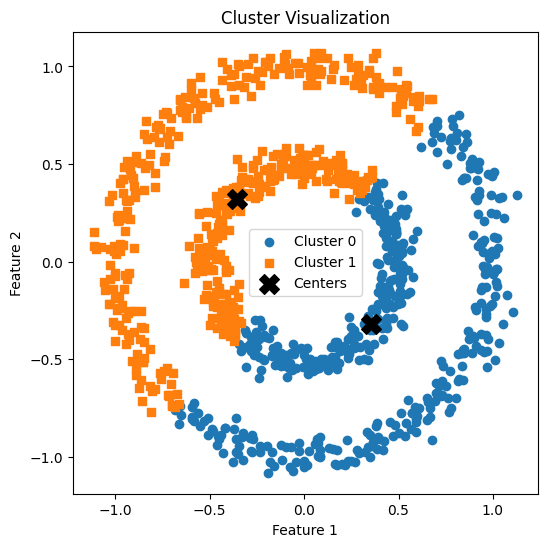

In [69]:
# KMeans로 make_circles( ) 데이터 세트를 군집화 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0) 
kmeans_labels = kmeans.fit_predict(X) 
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

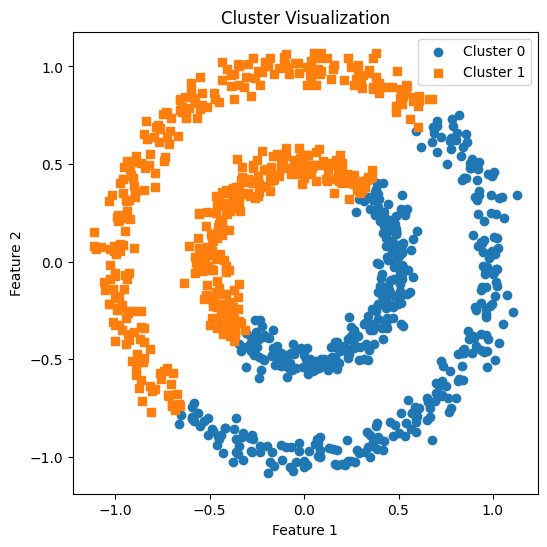

In [70]:
# GMM으로 make_circles( ) 데이터 세트를 군집화 수행.
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label
visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

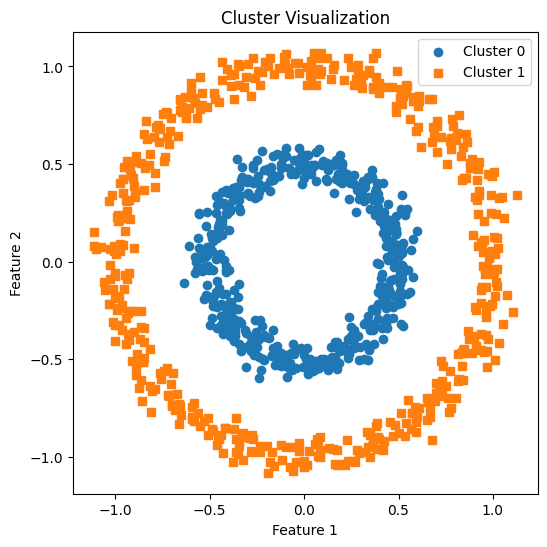

In [71]:
# DBSCAN으로 make_circles( ) 데이터 세트 군집화 수행.
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels
visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

In [72]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
retail_df = pd.read_excel(io='Online Retail.xlsx')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [74]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [75]:
retail_df = retail_df[retail_df['Quantity' ] > 0]
retail_df = retail_df[retail_df['UnitPrice'] > 0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [76]:
retail_df['Country'].value_counts()[:5]

Country
United Kingdom    354321
Germany             9040
France              8341
EIRE                7236
Spain               2484
Name: count, dtype: int64

In [77]:
retail_df = retail_df[retail_df['Country']=='United Kingdom'] 
print(retail_df.shape)

(354321, 8)


In [78]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice'] 
retail_df['CustomerlD' ] = retail_df['CustomerID'].astype(int)
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df .groupby('CustomerlD')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841.0    7847
14096.0    5111
12748.0    4595
14606.0    2700
15311.0    2379
Name: count, dtype: int64
CustomerlD
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [79]:
retail_df.groupby(['InvoiceNo', 'StockCode'])['InvoiceNo'].count().mean()

1.028702077315023

In [80]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 countO, Monetary value는 sale_amount 칼럼의 sum() 
aggregations = {
'InvoiceDate': 'max', 
'InvoiceNo': 'count', 
'sale_amount':'sum' 
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경 
cust_df = cust_df.rename(columns = {'InvoiceDate': 'Recency', 
                                    'InvoiceNo': 'Frequency', 
                                    'sale_amount':'Monetary'
}
)
cust_df = cust_df.reset_index() 
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,2011-01-18 10:01:00,1,77183.60
1,12747.0,2011-12-07 14:34:00,103,4196.01
2,12748.0,2011-12-09 12:20:00,4595,33719.73


In [81]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011, 12, 10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1) 
print('cust_df 로우와 칼럼 건수는 ', cust_df.shape) 
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,3,103,4196.01
2,12748.0,1,4595,33719.73


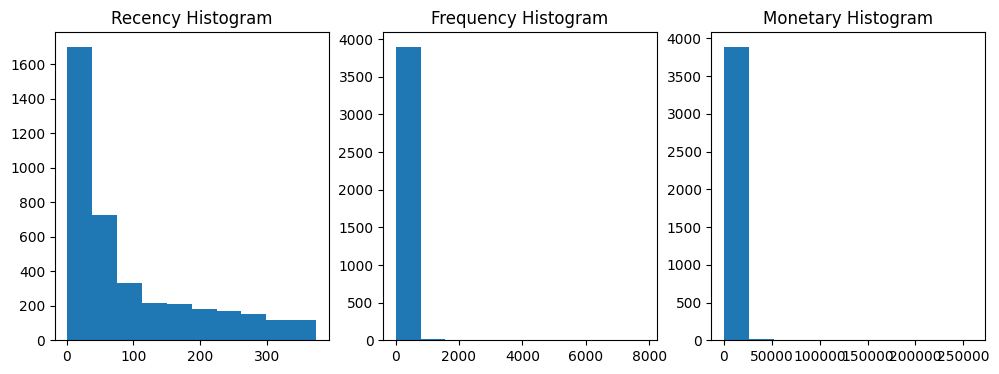

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12, 4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])
ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])
ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [83]:
cust_df[['Recency', 'Frequency', 'Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
X_features = cust_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df ['cluster_label'] = labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.576


In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def visualize_silhouette(k_list, X, random_state=42):
    for k in k_list:
        km = KMeans(n_clusters=k, random_state=random_state)
        labels = km.fit_predict(X)

        silhouette_avg = silhouette_score(X, labels)
        sample_silhouette_values = silhouette_samples(X, labels)

        # 각 클러스터별 평균 실루엣 출력
        print(f"\n► n_clusters = {k} → 전체 실루엣 스코어: {silhouette_avg:.3f}")
        for i in range(k):
            vals = sample_silhouette_values[labels == i]
            print(f"   cluster {i} 평균 실루엣: {vals.mean():.3f}")

        # 실루엣 플롯
        fig, ax = plt.subplots(figsize=(8, 6))
        y_lower = 10

        for i in range(k):
            ith_vals = np.sort(sample_silhouette_values[labels == i])
            size_cluster = ith_vals.shape[0]
            y_upper = y_lower + size_cluster

            color = plt.cm.nipy_spectral(float(i) / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, ith_vals,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ax.text(-0.05, (y_lower + y_upper) / 2, str(i))
            y_lower = y_upper + 10

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_title(f"Silhouette plot (k={k})")
        ax.set_xlabel("Silhouette coefficient")
        ax.set_ylabel("Cluster label")
        plt.show()


In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import math

def visualize_kmeans_plot_multi(k_list, X, random_state=42):
    # 자동 PCA 적용 (2D)
    if X.shape[1] > 2:
        pca = PCA(n_components=2, random_state=random_state)
        X_plot = pca.fit_transform(X)
        print("자동 PCA 적용됨 → 2차원으로 축소하여 시각화합니다.")
    else:
        X_plot = np.array(X)

    # subplot grid 자동 계산
    n = len(k_list)
    cols = 2
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 5 * rows))
    axes = np.array(axes).reshape(-1)

    for idx, k in enumerate(k_list):
        km = KMeans(n_clusters=k, random_state=random_state)
        labels = km.fit_predict(X_plot)
        centers = km.cluster_centers_

        ax = axes[idx]
        ax.scatter(X_plot[:, 0], X_plot[:, 1], c=labels, cmap='viridis', s=10)
        ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=120, edgecolor='black')
        ax.set_title(f"KMeans (k={k})")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")

    # 남은 빈 subplot 제거
    for j in range(n, rows * cols):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



► n_clusters = 2 → 전체 실루엣 스코어: 0.917
   cluster 0 평균 실루엣: 0.921
   cluster 1 평균 실루엣: -0.019


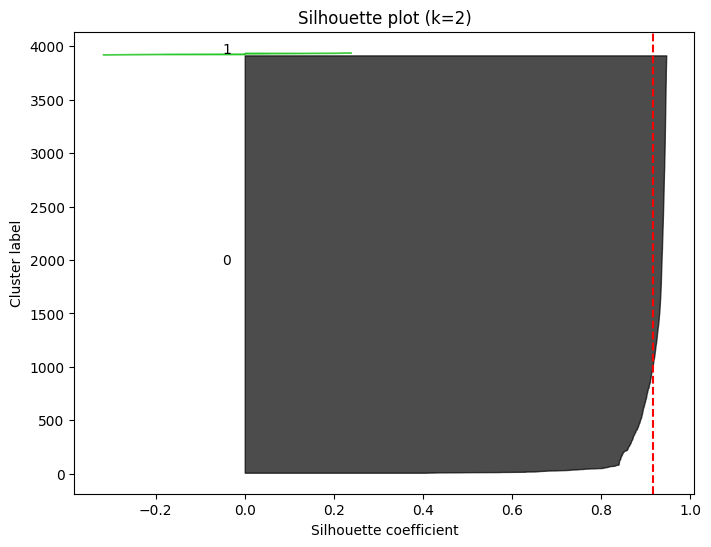


► n_clusters = 3 → 전체 실루엣 스코어: 0.592
   cluster 0 평균 실루엣: 0.595
   cluster 1 평균 실루엣: -0.026
   cluster 2 평균 실루엣: 0.595


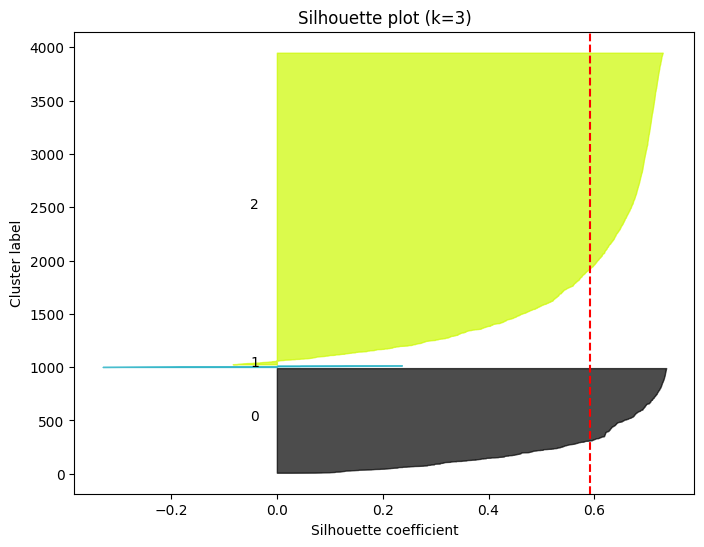


► n_clusters = 4 → 전체 실루엣 스코어: 0.595
   cluster 0 평균 실루엣: 0.591
   cluster 1 평균 실루엣: 0.165
   cluster 2 평균 실루엣: 0.599
   cluster 3 평균 실루엣: 0.571


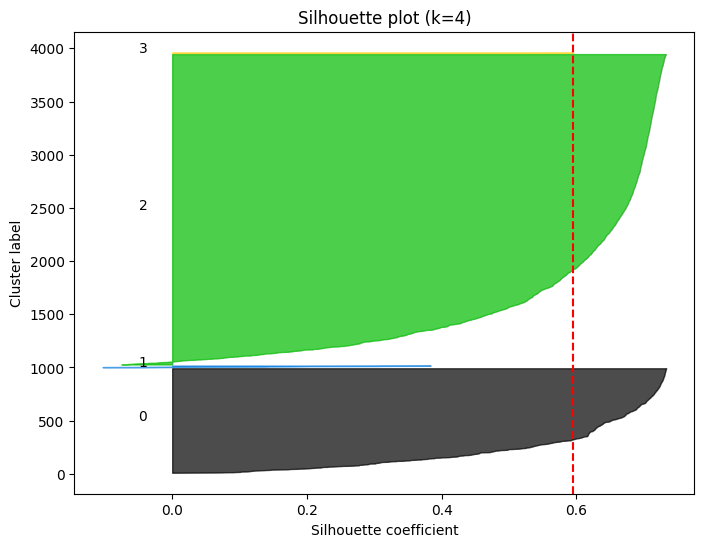


► n_clusters = 5 → 전체 실루엣 스코어: 0.611
   cluster 0 평균 실루엣: 0.588
   cluster 1 평균 실루엣: 0.041
   cluster 2 평균 실루엣: 0.632
   cluster 3 평균 실루엣: 0.536
   cluster 4 평균 실루엣: 0.659


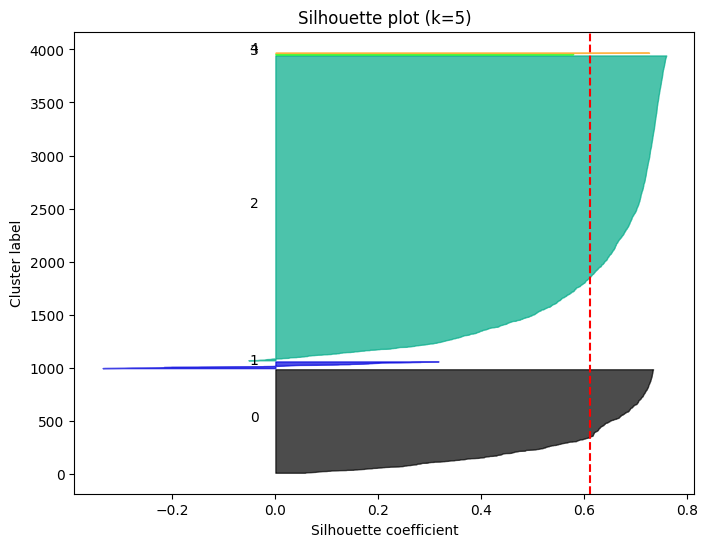

자동 PCA 적용됨 → 2차원으로 축소하여 시각화합니다.


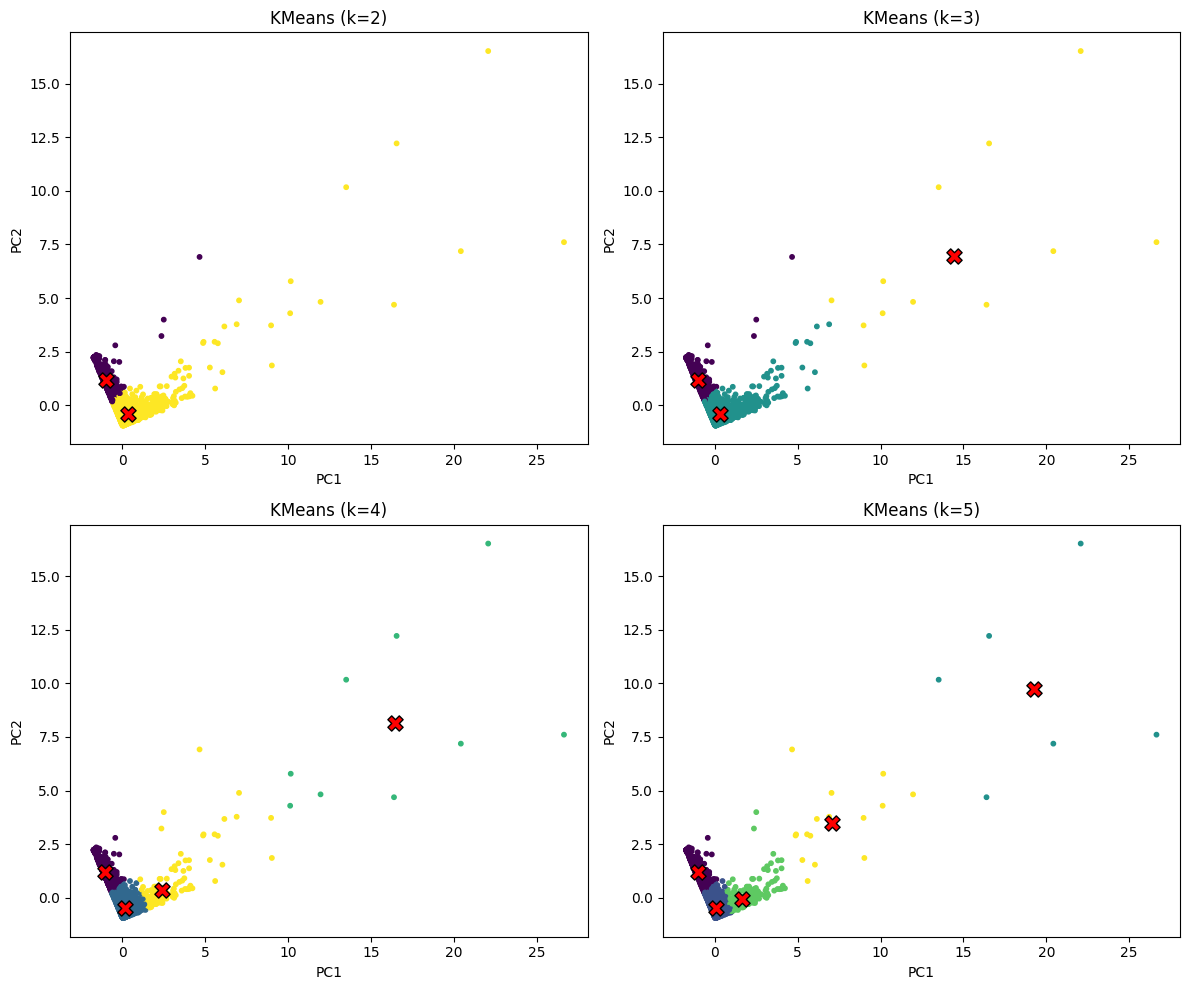

In [98]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled) 
visualize_kmeans_plot_multi([2, 3, 4, 5], X_features_scaled)

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
# Recency, Frequecny, Monetary 칼럼에 np.loglp()로 Log Transformation 
cust_df['Recency_log'] = np.log1p(cust_df['Recency']) 
cust_df['Frequency_log'] = np.log1p(cust_df ['Frequency' ]) 
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])
# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df [ ['Recency_log', 'Frequency_log', 'Monetary_log' ] ]. values 
X_features_scaled = StandardScaler().fit_transform(X_features)
kmeans = KMeans(n_clusters=3, random_state=0) 
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels
print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어는 : 0.303
